In [1]:
import pandas as pd
import csv 
import matplotlib.pyplot as plt

In [57]:
gallup = pd.read_csv('/Users/chris/Desktop/Thesis/Data/gallup_raw.csv')
gallup

,DATE,% China,% Russia,% North Korea,% Iran
0,2023,50,32,7,2
1,2022,49,32,6,2
2,2021,45,26,9,4
3,2020,22,23,12,19
4,2019,21,32,14,9
5,2018,11,19,51,7
6,2016,12,15,16,14
7,2015,12,18,15,9
8,2014,20,9,16,16
9,2012,23,2,10,32


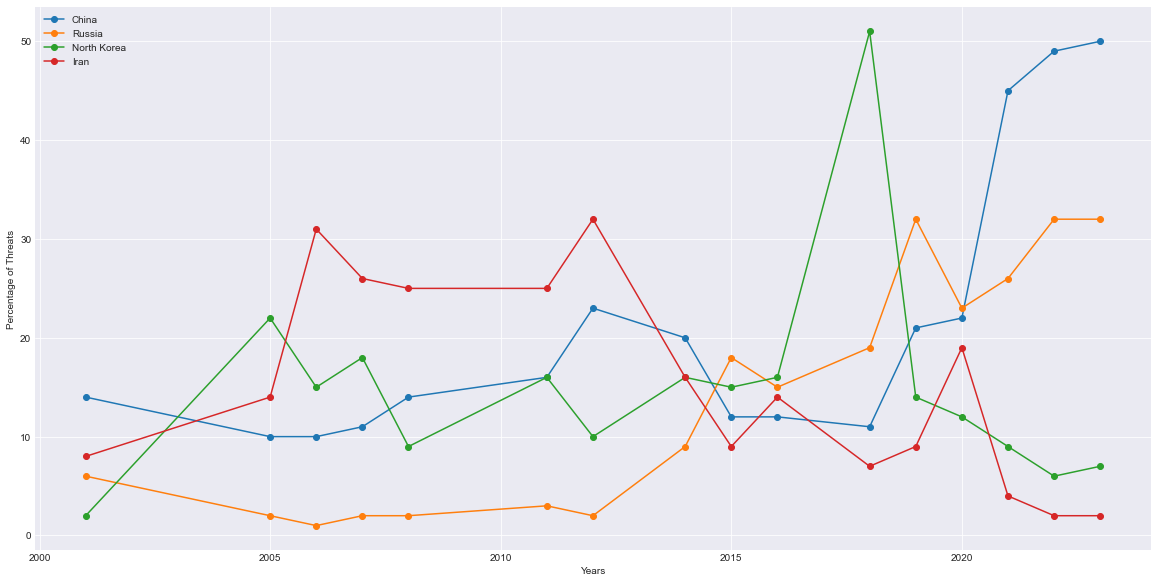

In [58]:
# Setting the style
plt.style.use('seaborn-darkgrid')

# Create a color palette
palette = plt.get_cmap('tab10')  # Using 'tab10' for a broad range of distinct colors

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(gallup.iloc[:,0], gallup.iloc[:,1],marker='o', label='China')
ax.plot(gallup.iloc[:,0], gallup.iloc[:,2],marker='o', label='Russia')
ax.plot(gallup.iloc[:,0], gallup.iloc[:,3],marker='o', label='North Korea')
ax.plot(gallup.iloc[:,0], gallup.iloc[:,4],marker='o', label='Iran')

ax.set_xlabel('Years')
ax.set_ylabel('Percentage of Threats')
ax.legend()

In [36]:
# Remove data before 2014 
gallup = gallup.reset_index()
gallup2 = gallup.drop(columns='index')
gallup3 = gallup2[7:]

In [59]:
gallup3

,DATE,% China,% Russia,% North Korea,% Iran
0,2014,20,9,16,16
1,2015,12,18,15,9
2,2016,12,15,16,14
3,2017,11.5,17.0,33.5,10.5
4,2018,11,19,51,7
5,2019,21,32,14,9
6,2020,22,23,12,19
7,2021,45,26,9,4
8,2022,49,32,6,2
9,2023,50,32,7,2


In [43]:
#fill in the missing value in 2017 using average value of 2016 and 2018

data_2016 = gallup3[gallup3['DATE'] == 2016].reset_index(drop=True)
data_2018 = gallup3[gallup3['DATE'] == 2018].reset_index(drop=True)

# Calculate the average values of 2016 and 2018. This assumes all other columns are numerical and should be averaged.
average_data = (data_2016.iloc[0, 1:] + data_2018.iloc[0, 1:]) / 2

# Create a new DataFrame row for 2017 with these average values
data_2017 = pd.DataFrame(columns=gallup3.columns)
data_2017.loc[0, 'DATE'] = 2017
data_2017.loc[0, 1:] = average_data.values

# Append this new row to the original DataFrame
gallup3 = gallup3.append(data_2017, ignore_index=True)

# Sort the DataFrame by 'DATE' to ensure chronological order
gallup3.sort_values(by='DATE', inplace=True)
# Optionally, you might want to reset the index after sorting
gallup3.reset_index(drop=True, inplace=True)

/var/folders/nq/5z_sx69s5ngg5p145v4g54t80000gn/T/ipykernel_26462/1233575928.py:10: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  data_2017.loc[0, 1:] = average_data.values
/var/folders/nq/5z_sx69s5ngg5p145v4g54t80000gn/T/ipykernel_26462/1233575928.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gallup3 = gallup3.append(data_2017, ignore_index=True)


In [60]:
gallup3

,DATE,% China,% Russia,% North Korea,% Iran
0,2014,20,9,16,16
1,2015,12,18,15,9
2,2016,12,15,16,14
3,2017,11.5,17.0,33.5,10.5
4,2018,11,19,51,7
5,2019,21,32,14,9
6,2020,22,23,12,19
7,2021,45,26,9,4
8,2022,49,32,6,2
9,2023,50,32,7,2


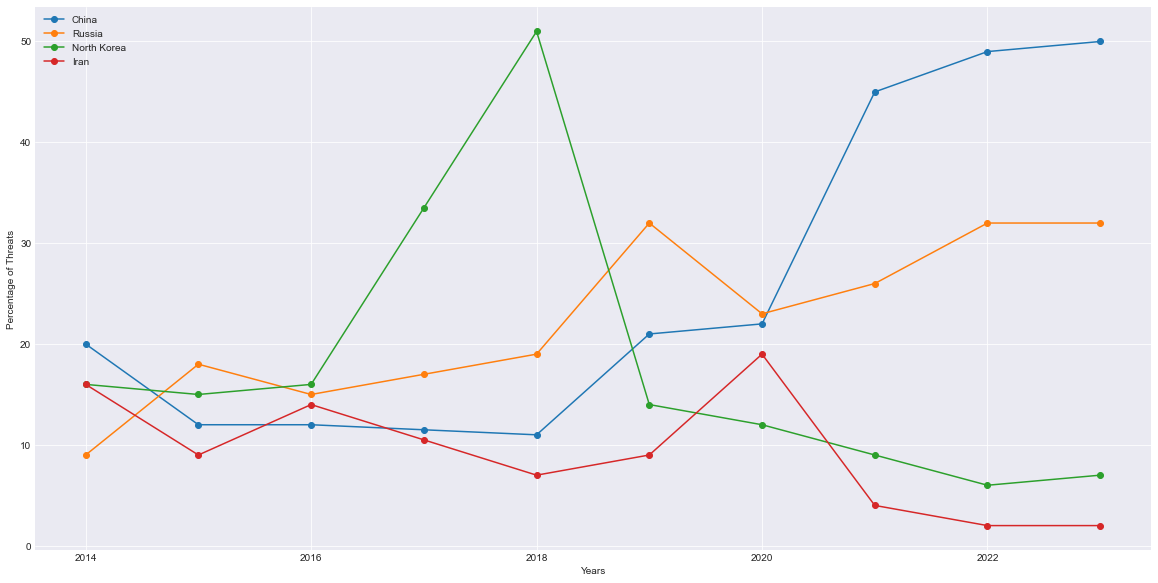

In [55]:
# Setting the style
plt.style.use('seaborn-darkgrid')

# Create a color palette
palette = plt.get_cmap('tab10')  # Using 'tab10' for a broad range of distinct colors

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(gallup3.iloc[:,0], gallup3.iloc[:,1],marker='o', label='China')
ax.plot(gallup3.iloc[:,0], gallup3.iloc[:,2],marker='o', label='Russia')
ax.plot(gallup3.iloc[:,0], gallup3.iloc[:,3],marker='o', label='North Korea')
ax.plot(gallup3.iloc[:,0], gallup3.iloc[:,4],marker='o', label='Iran')

ax.set_xlabel('Years')
ax.set_ylabel('Percentage of Threats')
ax.legend()

In [64]:
gallup3.to_csv("/Users/chris/Desktop/Thesis/Data/gallup_cleaned.csv")